In [19]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt

In [20]:
max_words = 1000
batch_size = 32
epochs = 5

In [21]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
8982 train sequences
2246 test sequences


In [23]:
# x_train[0]
# y_train[2]
word_index = reuters.get_word_index(path="reuters_word_index.json")
word_index["news"]

# index_to_word = {}
# for key, value in word_index.items():
#     index_to_word[value] = key

494

In [10]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [11]:
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Building model...


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 218us/step - loss: 1.4286 - acc: 0.6787 - val_loss: 1.0893 - val_acc: 0.7631
Epoch 2/5
8083/8083 [==============================] - 1s 175us/step - loss: 0.7884 - acc: 0.8169 - val_loss: 0.9372 - val_acc: 0.7887
Epoch 3/5
8083/8083 [==============================] - 1s 183us/step - loss: 0.5505 - acc: 0.8642 - val_loss: 0.8909 - val_acc: 0.7942
Epoch 4/5
8083/8083 [==============================] - 2s 200us/step - loss: 0.4163 - acc: 0.9002 - val_loss: 0.8815 - val_acc: 0.8053
Epoch 5/5
8083/8083 [==============================] - 2s 195us/step - loss: 0.3254 - acc: 0.9167 - val_loss: 0.9133 - val_acc: 0.8009


In [14]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

2246/2246 [==============================] - 0s 28us/step


In [15]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8846290175233266
Test accuracy: 0.7938557435440784


In [16]:
model.metrics_names

['loss', 'acc']

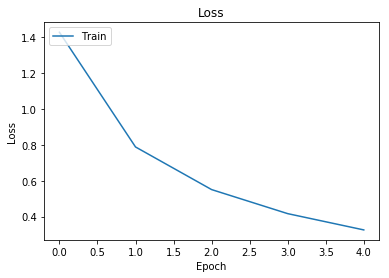

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

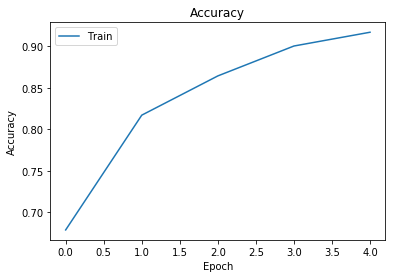

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()